In [54]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context("talk")

## Using Neville's data

In [172]:
df = pd.read_excel('output.xlsx')
df.head()

,address,contractor_fees,contributions_all_other,contributions_fundraising_events,contributions_government_grants,contributions_related_organizations,contributions_total,eins,employees,expenses_post,...,phonenumber,preparer,tax_year,total_assets_post,total_assets_pre,total_liabilities_post,total_liabilities_pre,total_volunteers,website,zipcode
0,"455 EAST BAY DRIVE, LONG BEACH, NY",1061216.0,216443.0,62500.0,1976692.0,10000.0,2267651.0,111635084,1059.0,71078688.0,...,5.168971e+09,LOEB & TROPER LLP,2010.0,36696007.0,36897822.0,45665853.0,42752966.0,125.0,LBMC.ORG,11561.0
1,"PO BOX 442, FARMINGVILLE, NY",NaN,NaN,NaN,NaN,NaN,NaN,112817283,3.0,250199.0,...,6.317361e+09,OKEEFE AND COMPANY LLC,2010.0,865285.0,919438.0,166.0,-321.0,35.0,NaN,11738.0
2,"92-21 165TH STREET, JAMAICA, NY",NaN,25.0,NaN,NaN,NaN,8698.0,113586379,163.0,2823887.0,...,7.185266e+09,Pasternack & Company LLP,2011.0,836173.0,731876.0,341368.0,295223.0,NaN,WWW.TENDERCARENY.ORG,11433.0
3,"2201 S Clear Creek Road, Killeen, TX",NaN,NaN,NaN,NaN,NaN,NaN,113762050,14.0,1187427.0,...,2.545268e+09,NaN,2010.0,129146.0,196983.0,1301680.0,2299613.0,0.0,None,76549.0
4,"38 10TH STREET, STATEN ISLAND, NY",NaN,NaN,NaN,NaN,NaN,NaN,133336682,NaN,NaN,...,7.186674e+09,DeSantis Kiefer Shall & Sarcone LLP,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,10306.0


Important fields:
- (1) Total number of employees
- (2) Officer compensation
- (3) Total assets
- (4) Lobbying
- (5) Professional fundraising costs
- (6) Land, building and equipment costs

In [173]:
df.transpose().iloc[:,91]

address                                                 2651 SAULINO COURT, DEARBORN, MI
contractor_fees                                                                      NaN
contributions_all_other                                                      4.97881e+06
contributions_fundraising_events                                                     NaN
contributions_government_grants                                              1.41428e+07
contributions_related_organizations                                                  NaN
contributions_total                                                          1.91585e+07
eins                                                                           237444497
employees                                                                            445
expenses_post                                                                1.68278e+07
expenses_pre                                                                 1.67842e+07
fees_professional_fun

In [174]:
df.lobbying_costs_filing[df.lobbying_costs_filing.notnull()]

0      29151.0
561     4200.0
Name: lobbying_costs_filing, dtype: float64

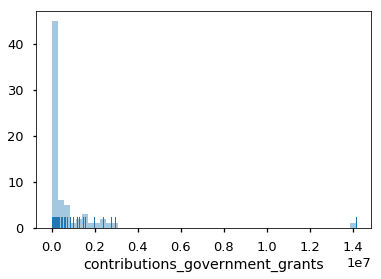

In [107]:
sns.distplot(df.contributions_government_grants[df.contributions_government_grants.notnull()],kde=False,rug=True);

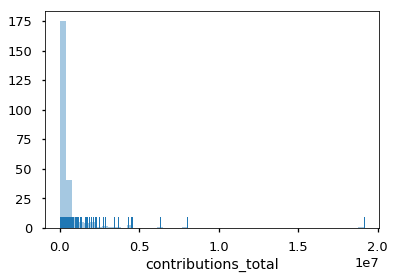

In [108]:
sns.distplot(df.contributions_total[df.contributions_total.notnull()],kde=False,rug=True);

In [109]:
gov_contributions = df.contributions_government_grants
gov_contributions.sort_values(ascending=False, na_position='last').head(5)

91     14142776.0
224     2956683.0
238     2743391.0
341     2394660.0
169     2382878.0
Name: contributions_government_grants, dtype: float64

In [73]:
df.iloc[91,:]

address                                                 2651 SAULINO COURT, DEARBORN, MI
contractor_fees                                                                      NaN
contributions_all_other                                                      4.97881e+06
contributions_fundraising_events                                                     NaN
contributions_government_grants                                                      NaN
contributions_related_organizations                                                  NaN
contributions_total                                                          1.91585e+07
eins                                                                           237444497
employees                                                                            445
expenses_post                                                                1.68278e+07
expenses_pre                                                                 1.67842e+07
fees_professional_fun

In [110]:
df.name[91]

u'ARAB COMMUNITY CENTER FOR ECONOMIC & SOCIAL SERVICES'

In [111]:
largestGovGrants_ix=gov_contributions.sort_values(ascending=False, na_position='last').head(10).index

In [112]:
largestGovGrants_ix

Int64Index([91, 224, 238, 341, 169, 6, 0, 496, 350, 533], dtype='int64')

In [118]:
df.loc[largestGovGrants_ix,['eins','name','website','contributions_government_grants']]

,eins,name,website,contributions_government_grants
91,237444497,ARAB COMMUNITY CENTER FOR ECONOMIC & SOCIAL SE...,www.AccessCommunity.Org,14142776.0
224,363196629,ADVOCATE NORTH SIDE HEALTH NETWORK,WWW.ADVOCATEHEALTH.COM,2956683.0
238,370798015,Community Counseling Center of Northern,cccnmc.org,2743391.0
341,480554802,ASSOCIATED YOUTH SERVICES INC,Http://aysusa.org,2394660.0
169,311381901,ELIZABETH'S NEW LIFE CENTER,WWW.ELIZABETHNEWLIFE.ORG,2382878.0
6,141588402,MIDDLETOWN COMMUNITY HEALTH CENTER INC,WWW.MCHCCARES.ORG,1993526.0
0,111635084,LONG BEACH MEDICAL CENTER,LBMC.ORG,1976692.0
496,720977636,CARE PREGNANCY CLINIC,NaN,1548436.0
350,521054102,HOUSE OF RUTH,WWW.HOUSEOFRUTH.ORG,1485045.0
533,752813621,ELLIS COUNTY COALITION FOR HEALTH,WWW.HOPECLINICELLISCOUNTY.COM,1447984.0


In [116]:
largestOrgs_ix = df.employees.sort_values(ascending=False,na_position='last').head(10).index
df.loc[largestOrgs_ix,['eins','employees','name','website']]

,eins,employees,name,website
224,363196629,3342.0,ADVOCATE NORTH SIDE HEALTH NETWORK,WWW.ADVOCATEHEALTH.COM
532,752702388,1897.0,Texas Health Resources,www.texashealth.org
0,111635084,1059.0,LONG BEACH MEDICAL CENTER,LBMC.ORG
556,810233499,643.0,SIDNEY HEALTH CENTER,www.sidneyhealth.org
280,411804205,526.0,LifeCare Medical Center,www.lifecaremedicalcenter.org
364,540534606,480.0,Richfield Recovery and Care Center,Richfieldretirement.com
91,237444497,445.0,ARAB COMMUNITY CENTER FOR ECONOMIC & SOCIAL SE...,www.AccessCommunity.Org
64,231401561,426.0,Fulton County Medical Center,www.fcmcpa.org
347,510192422,336.0,Home & Hospice Care of Rhode Island,www.hhcri.org
296,430889658,295.0,THE COUNTRY CLUB OF ST ALBANS INC,WWW.CCSTALBANS.COM


In [123]:
df_byGovGrant = df.sort_values(by='total_assets_post',ascending=False)
df_byGovGrant[['name','eins','website','contributions_government_grants','total_assets_post']].head(10)

,name,eins,website,contributions_government_grants,total_assets_post
532,Texas Health Resources,752702388,www.texashealth.org,275376.0,2.376439e+09
588,LOKAHI ASSURANCE LTD,912171891,NaN,NaN,1.439699e+09
224,ADVOCATE NORTH SIDE HEALTH NETWORK,363196629,WWW.ADVOCATEHEALTH.COM,2956683.0,3.884040e+08
482,Cooperativa AC La Sagrada Familia,660269897,NaN,NaN,1.115978e+08
556,SIDNEY HEALTH CENTER,810233499,www.sidneyhealth.org,NaN,6.212977e+07
260,MIDLAND CENTER FOR THE ARTS INC,386114020,WWW.MCFTA.ORG,NaN,5.505888e+07
64,Fulton County Medical Center,231401561,www.fcmcpa.org,128837.0,5.299064e+07
280,LifeCare Medical Center,411804205,www.lifecaremedicalcenter.org,38908.0,5.060547e+07
0,LONG BEACH MEDICAL CENTER,111635084,LBMC.ORG,1976692.0,3.669601e+07
91,ARAB COMMUNITY CENTER FOR ECONOMIC & SOCIAL SE...,237444497,www.AccessCommunity.Org,14142776.0,3.202862e+07


In [180]:
df_byGovGrant = df.sort_values(by='contributions_government_grants',ascending=False)
df2 = df_byGovGrant[['name','eins','website','contributions_government_grants','total_assets_post']]
print df2.shape
df2.tail(10)

(619, 5)


,name,eins,website,contributions_government_grants,total_assets_post
609,PREGNANCY RESOURCE SERVICES,943097958,NaN,NaN,NaN
610,CRISIS PREGNANCY CTR OF SKAGIT CO DBA PREGNANC...,943124655,www.pregnancychoices.org,NaN,243071.0
611,NaN,943172688,NaN,NaN,NaN
612,THE GUIDANCE CENTER,951691017,WWW.TGCLB.ORG,NaN,2623508.0
613,WOMEN'S CLINIC & FAMILY COUNSELING CENTE,952800022,WWW.WOMEN-CLINIC.ORG,NaN,287145.0
614,NaN,954087667,NaN,NaN,NaN
615,PREGNANCY RESOURCE CENTER OF THE,954184344,NaN,NaN,NaN
616,NaN,954431019,NaN,NaN,NaN
617,NaN,954737166,NaN,NaN,NaN
618,KAUA'I MEDICAL CLINIC,990326099,WWW.WILCOXHEALTH.ORG,NaN,6671191.0


In [182]:
df2 = df2.dropna(subset=['contributions_government_grants'])
print df2.shape
df2.to_csv('EINs_w_govGrantData.csv',index=False)

(69, 5)


In [144]:
name = df.name.str.contains('Texas',na=False)
df[name]

,address,contractor_fees,contributions_all_other,contributions_fundraising_events,contributions_government_grants,contributions_related_organizations,contributions_total,eins,employees,expenses_post,...,phonenumber,preparer,tax_year,total_assets_post,total_assets_pre,total_liabilities_post,total_liabilities_pre,total_volunteers,website,zipcode
531,"1000 South Beckham Avenue, Tyler, TX",NaN,NaN,NaN,NaN,NaN,0.0,752627236,0.0,5316486.0,...,9.035964e+09,NaN,2009.0,4.734047e+06,4.364558e+06,4.734047e+06,4.364558e+06,NaN,WWW.ETMC.ORG,75701.0
532,"612 E Lamar Blvd Suite 1400, Arlington, TX",20586988.0,12263.0,NaN,275376.0,67250.0,354889.0,752702388,1897.0,352788193.0,...,6.822368e+09,TEXAS HEALTH RESOURCES,2010.0,2.376439e+09,2.159204e+09,2.250129e+09,2.257785e+09,NaN,www.texashealth.org,76011.0


## Now using Jenny's data

Explanation of fields available at: https://github.com/lecy/Open-Data-for-Nonprofit-Research/blob/master/Build_IRS990_E-Filer_Datasets/Data%20Dictionary.csv

In [149]:
df = pd.read_csv('CPC990AllData.csv',index_col=0)
df.head(5)

,EIN,NAME,DBA,FISYR,STATE,ADDRESS,CITY,ZIP,STYEAR,ENDYEAR,...,LOBLBFILING,LOBLBAFFIL,TOTLOBEXPFILING,TOTLOBEXPAFFIL,OTHEREXEMPTFILING,OTHEREXEMPTAFFIL,TOTEXEMPTFILING,TOTEXEMPTAFFIL,LOBNTFILING,LOBNTAFFIL
1,311743727,PREGNANCY SERVICE CENTER INC,NaN,2014,KS,104 WEST ELM,SALINA,67401,2014-01-01,2014-12-31,...,0,0,0,0,0,0,0,0,0,0
2,371182626,LIVING ALTERNATIVES PREGNANCY RESOURCE CENTER,NaN,2014,IL,205 E WILBER AVE,CHAMPAIGN,61822,2014-01-01,2014-12-31,...,0,0,0,0,0,0,0,0,0,0
3,521054102,HOUSE OF RUTH,NaN,2013,DC,5 THOMAS CIRCLE NW,WASHINGTON,200054153,2013-07-01,2014-06-30,...,0,0,0,0,0,0,0,0,0,0
4,931073288,PREGNANCY RESOURCE CENTERS,NaN,2013,OR,369 NE REVERE AVE,BEND,97701,2013-10-01,2014-09-30,...,0,0,0,0,0,0,0,0,0,0
5,263080281,HOPES CENTER OF RACINE INC,NaN,2013,WI,521 SIXTH STREET,RACINE,53403,2013-09-01,2014-08-31,...,0,0,0,0,0,0,0,0,0,0


In [156]:
df[df.CITY.str.contains('DOWNERS GROVE')]

,EIN,NAME,DBA,FISYR,STATE,ADDRESS,CITY,ZIP,STYEAR,ENDYEAR,...,LOBLBFILING,LOBLBAFFIL,TOTLOBEXPFILING,TOTLOBEXPAFFIL,OTHEREXEMPTFILING,OTHEREXEMPTAFFIL,TOTEXEMPTFILING,TOTEXEMPTAFFIL,LOBNTFILING,LOBNTAFFIL
426,363196629,ADVOCATE NORTH SIDE HEALTH NETWORK,NaN,2014,IL,3075 HIGHLAND PARKWAY,DOWNERS GROVE,60515,2014-01-01,2014-12-31,...,0,0,0,0,0,0,0,0,0,0
988,363196629,Advocate North Side Health Network,NaN,2015,IL,3075 HIGHLAND PARKWAY STE 600,DOWNERS GROVE,60515,2015-01-01,2015-12-31,...,0,0,0,0,0,0,0,0,0,0
2017,363196629,ADVOCATE NORTH SIDE HEALTH NETWORK,NaN,2012,IL,3075 HIGHLAND PARKWAY,DOWNERS GROVE,60515,2012-01-01,2012-12-31,...,0,0,0,0,0,0,0,0,0,0
2506,363196629,ADVOCATE NORTH SIDE HEALTH NETWORK,NaN,2013,IL,3075 HIGHLAND PARKWAY,DOWNERS GROVE,60515,2013-01-01,2013-12-31,...,0,0,0,0,0,0,0,0,0,0


In [157]:
df.columns.tolist()

['EIN',
 'NAME',
 'DBA',
 'FISYR',
 'STATE',
 'ADDRESS',
 'CITY',
 'ZIP',
 'STYEAR',
 'ENDYEAR',
 'TAXPREP',
 'FORMTYPE',
 'GROSSRECEIPTS',
 'GROUPRETURN',
 'GROUPEXEMPTNUM',
 'FORMYEAR',
 'DOMICILE',
 'WEBSITE',
 'URL',
 'FORMORGASSOC',
 'FORMORGCORP',
 'FORMORGTRUST',
 'FORMORGOTHER',
 'FORMORGOTHERDESC',
 'FORMORG',
 'ACCTACCRUAL',
 'ACCTCASH',
 'ACCTOTHER',
 'ACCTMETHOD',
 'EXEMPT4947A1',
 'EXEMPT501C',
 'EXEMPT501CNUM',
 'EXEMPT501C3',
 'EXEMPT527',
 'EXEMPTSTATUS',
 'MISSION',
 'DISCOPS',
 'VOTINGMEMBERS',
 'INDVOTINGMEMBERS',
 'TOTEMPLOYEE',
 'TOTVOLUNTEERS',
 'TOTUBI',
 'NETUBI',
 'CONTRIBPRIOR',
 'CONTRIBCURRENT',
 'PSRPRIOR',
 'PSRCURRENT',
 'INVINCPRIOR',
 'INVINCCURRENT',
 'OTHERREVPRIOR',
 'OTHERREVCURRENT',
 'TOTALREVPRIOR',
 'TOTALREVCURRENT',
 'MEMBERDUES',
 'GROSSSALESOTHER',
 'SALESCOSTOTHER',
 'NETSALESOTHER',
 'GROSSINCGAMING',
 'GROSSINCFNDEVENTS',
 'GAMINGEXP',
 'FNDEVENTSEXP',
 'EXPGAMINGFNDEVENTS',
 'GAMINGNET',
 'FNDEVENTSNET',
 'NETGAMINGFNDEVENTS',
 'GROSSSAL

## Jenny's data with added google reviews 

In [188]:
df = pd.read_csv('all_990_reviews.csv',index_col=0,usecols=range(1,237))
df.head(5)

,EIN,NAME,DBA,FISYR,STATE,ADDRESS,CITY,ZIP,STYEAR,ENDYEAR,...,LOBLBAFFIL,TOTLOBEXPFILING,TOTLOBEXPAFFIL,OTHEREXEMPTFILING,OTHEREXEMPTAFFIL,TOTEXEMPTFILING,TOTEXEMPTAFFIL,LOBNTFILING,LOBNTAFFIL,reviews
1,311743727,PREGNANCY SERVICE CENTER INC,NaN,2014,KS,104 WEST ELM,SALINA,67401,2014-01-01,2014-12-31,...,0,0,0,0,0,0,0,0,0,Wonderful people and they extend a lot of hel...
2,371182626,LIVING ALTERNATIVES PREGNANCY RESOURCE CENTER,NaN,2014,IL,205 E WILBER AVE,CHAMPAIGN,61822,2014-01-01,2014-12-31,...,0,0,0,0,0,0,0,0,0,I love this place! Very helpful and friendly.
3,521054102,HOUSE OF RUTH,NaN,2013,DC,5 THOMAS CIRCLE NW,WASHINGTON,200054153,2013-07-01,2014-06-30,...,0,0,0,0,0,0,0,0,0,I lived in house of Ruth in Washington DC whe...
4,931073288,PREGNANCY RESOURCE CENTERS,NaN,2013,OR,369 NE REVERE AVE,BEND,97701,2013-10-01,2014-09-30,...,0,0,0,0,0,0,0,0,0,"If you are seeking an abortion, do not come h..."
5,263080281,HOPES CENTER OF RACINE INC,NaN,2013,WI,521 SIXTH STREET,RACINE,53403,2013-09-01,2014-08-31,...,0,0,0,0,0,0,0,0,0,A place for those experiencing homelessness t...


In [165]:
df.columns.tolist()

['EIN',
 'NAME',
 'DBA',
 'FISYR',
 'STATE',
 'ADDRESS',
 'CITY',
 'ZIP',
 'STYEAR',
 'ENDYEAR',
 'TAXPREP',
 'FORMTYPE',
 'GROSSRECEIPTS',
 'GROUPRETURN',
 'GROUPEXEMPTNUM',
 'FORMYEAR',
 'DOMICILE',
 'WEBSITE',
 'URL',
 'FORMORGASSOC',
 'FORMORGCORP',
 'FORMORGTRUST',
 'FORMORGOTHER',
 'FORMORGOTHERDESC',
 'FORMORG',
 'ACCTACCRUAL',
 'ACCTCASH',
 'ACCTOTHER',
 'ACCTMETHOD',
 'EXEMPT4947A1',
 'EXEMPT501C',
 'EXEMPT501CNUM',
 'EXEMPT501C3',
 'EXEMPT527',
 'EXEMPTSTATUS',
 'MISSION',
 'DISCOPS',
 'VOTINGMEMBERS',
 'INDVOTINGMEMBERS',
 'TOTEMPLOYEE',
 'TOTVOLUNTEERS',
 'TOTUBI',
 'NETUBI',
 'CONTRIBPRIOR',
 'CONTRIBCURRENT',
 'PSRPRIOR',
 'PSRCURRENT',
 'INVINCPRIOR',
 'INVINCCURRENT',
 'OTHERREVPRIOR',
 'OTHERREVCURRENT',
 'TOTALREVPRIOR',
 'TOTALREVCURRENT',
 'MEMBERDUES',
 'GROSSSALESOTHER',
 'SALESCOSTOTHER',
 'NETSALESOTHER',
 'GROSSINCGAMING',
 'GROSSINCFNDEVENTS',
 'GAMINGEXP',
 'FNDEVENTSEXP',
 'EXPGAMINGFNDEVENTS',
 'GAMINGNET',
 'FNDEVENTSNET',
 'NETGAMINGFNDEVENTS',
 'GROSSSAL

In [171]:
print df.columns[df.columns.str.contains('GRANT')]
print df.columns[df.columns.str.contains('GOV')]

Index([u'GRANTSPAIDPRIOR', u'GRANTSPAIDCURRENT', u'PLEDGEGRANTBEGYEAR',
       u'PLEDGEGRANTENDYEAR', u'GRANTSPAYBEGYEAR', u'GRANTSPAYENDYEAR'],
      dtype='object')
Index([u'VMGOVERNING', u'IVMGOVERNING', u'CHANGESGOVDOCS', u'GOVBODYDECISION',
       u'GOVBODYDOCU'],
      dtype='object')


## Sentiment analysis for reviews

In [189]:
# print 'size unique tweets: ', utweets.shape
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
# Add appropriate columns
df.insert(loc=df.shape[1],column='compound',value=np.nan)
df.insert(loc=df.shape[1],column='neu',value=np.nan)
df.insert(loc=df.shape[1],column='pos',value=np.nan)
df.insert(loc=df.shape[1],column='neg',value=np.nan)


In [194]:
for index, row in df.iterrows():
#     print row['reviews']
    vs = analyzer.polarity_scores(str(row['reviews']))
    df.loc[index,'compound']=vs['compound']
    df.loc[index,'neu']=vs['neu']
    df.loc[index,'pos']=vs['pos']
    df.loc[index,'neg']=vs['neg']

In [206]:
df[['NAME','compound','neu','pos','neu']].head()

,NAME,compound,neu,pos,neu
1,PREGNANCY SERVICE CENTER INC,0.9881,0.682,0.318,0.682
2,LIVING ALTERNATIVES PREGNANCY RESOURCE CENTER,0.9011,0.266,0.734,0.266
3,HOUSE OF RUTH,0.9434,0.823,0.117,0.823
4,PREGNANCY RESOURCE CENTERS,-0.2144,0.674,0.147,0.674
5,HOPES CENTER OF RACINE INC,0.9442,0.706,0.294,0.706


In [197]:
df.loc[2671,'reviews']

' not impressed at their lack of common curiosity to both mothers and expectant fathers. their inability to rationalize and use common sense, in understanding and caring about the needs and the ability to work around peoples schedules   '

In [198]:
df.loc[2670,'reviews']

" Everyone here loves their job and is so helpful!! If you have an issue they will help you resolve it!! I'm so thankful I found this place, I didn't even know it existed. I'm also very thankful for Callie who works there, she has helped me more than I expected. The people are friendly and welcoming. No pressure. "

## Wordclouds by sentiment 

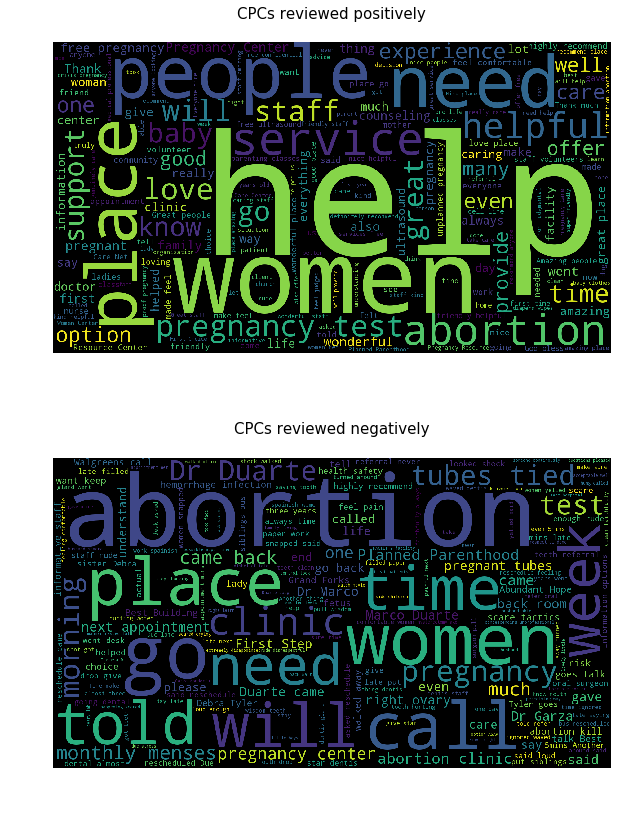

In [203]:
# 1: Wordcloud of reviews, split by majority positive and majority negative reviewed CPCs 
# Show word clouds of reviews majority positive vs negative reviews
# plt.figure(fig)
from wordcloud import WordCloud, STOPWORDS

toplot = df['reviews']

f, axarr = plt.subplots(2, sharex=True, figsize = (10,14));

# axarr[0].plot(x, y)
axarr[0].set_title('CPCs reviewed positively',fontsize=15)
axarr[1].set_title('CPCs reviewed negatively',fontsize=15)
# axarr[1].scatter(x, y)

pos = toplot[df['compound']>0.4]
neg = toplot[df['compound']<-0.4]

# join the pos tweets to a single string
words = ' '.join(pos)

# remove URLs, RTs, and twitter handles
no_urls_no_tags = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

wordcloud = WordCloud(
                      stopwords=STOPWORDS,
                      background_color='black',
                      width=1800,
                      height=1000
                     ).generate(no_urls_no_tags)

axarr[0].imshow(wordcloud)
axarr[0].axis('off')

# join the neg tweets to a single string
words = ' '.join(neg)

# remove URLs, RTs, and twitter handles
no_urls_no_tags = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

wordcloud = WordCloud(
                      stopwords=STOPWORDS,
                      background_color='black',
                      width=1800,
                      height=1000
                     ).generate(no_urls_no_tags)

axarr[1].imshow(wordcloud);
axarr[1].axis('off')
f.savefig('./pos_vs_neg_wordcloud_reviews.png', dpi=300)

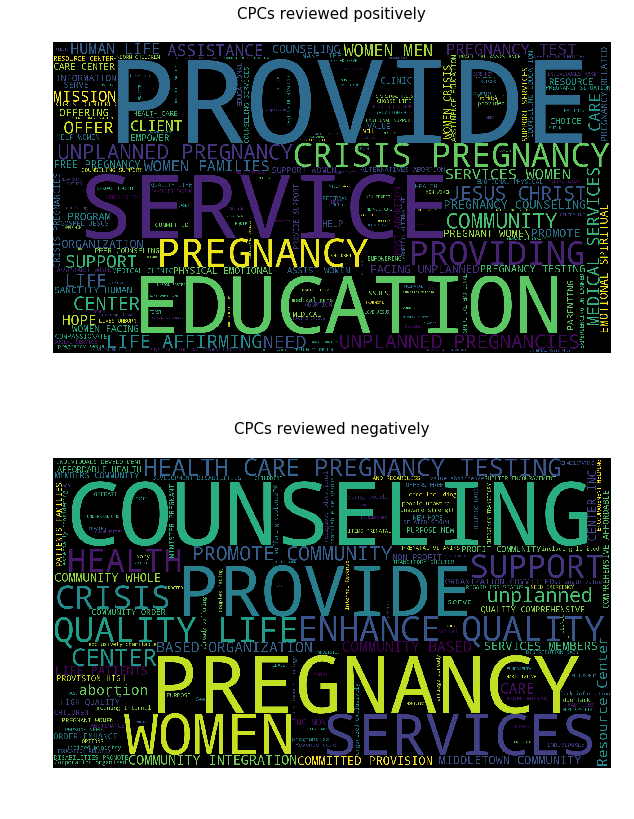

In [205]:
# 2. Wordcloud of mission statements, split by majority positively and majority negatively reviewed CPCs 
# Show word clouds of majority positive vs negative tweets
# plt.figure(fig)
from wordcloud import WordCloud, STOPWORDS

toplot = df['MISSION']

f, axarr = plt.subplots(2, sharex=True, figsize = (10,14));

# axarr[0].plot(x, y)
axarr[0].set_title('CPCs reviewed positively',fontsize=15)
axarr[1].set_title('CPCs reviewed negatively',fontsize=15)
# axarr[1].scatter(x, y)

pos = toplot[df['compound']>0.4]
neg = toplot[df['compound']<-0.4]

# join the pos text to a single string
words = ' '.join(pos)

# remove URLs, RTs, and twitter handles
no_urls_no_tags = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

wordcloud = WordCloud(
                      stopwords=STOPWORDS,
                      background_color='black',
                      width=1800,
                      height=1000
                     ).generate(no_urls_no_tags)

axarr[0].imshow(wordcloud)
axarr[0].axis('off')

# join the neg text to a single string
words = ' '.join(neg)

# remove URLs, RTs, and twitter handles
no_urls_no_tags = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

wordcloud = WordCloud(
                      stopwords=STOPWORDS,
                      background_color='black',
                      width=1800,
                      height=1000
                     ).generate(no_urls_no_tags)

axarr[1].imshow(wordcloud);
axarr[1].axis('off')
f.savefig('./pos_vs_neg_wordcloud_of_mission.png', dpi=300)